In [1]:
import numpy
import random

import warnings
warnings.simplefilter('ignore')


def ageNetWorthData():

    random.seed(42)
    numpy.random.seed(42)

    ages = []
    for ii in range(100):
        ages.append( random.randint(20,65) )
    net_worths = [ii * 6.25 + numpy.random.normal(scale=40.) for ii in ages]
### need massage list into a 2d numpy array to get it to work in LinearRegression
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    from sklearn.cross_validation import train_test_split
    ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths)

    return ages_train, ages_test, net_worths_train, net_worths_test

D:\Python\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Text(0,0.5,u'net worths')

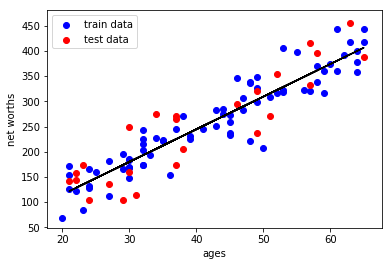

In [2]:
import sys
sys.path.append('E:/Data Science/ML/ud120-projects/tools/')
sys.path.append('E:/Data Science/ML/ud120-projects/choose_your_own')
sys.path.append('E:/Data Science/ML/ud120-projects/datasets_questions')

import os
os.chdir('E:/Data Science/ML/ud120-projects/datasets_questions')

import numpy
import matplotlib
matplotlib.use('agg')

import matplotlib.pyplot as plt
from class_vis import prettyPicture, output_image

ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()


from sklearn import linear_model

def studentReg(ages_train, net_worths_train):
    reg = linear_model.LinearRegression()
    reg.fit(ages_train, net_worths_train)
    return reg


reg = studentReg(ages_train, net_worths_train)

%matplotlib inline
plt.clf()
plt.scatter(ages_train, net_worths_train, color='b', label='train data')
plt.scatter(ages_test, net_worths_test, color='r', label='test data')
plt.plot(ages_test, reg.predict(ages_test), color='black')
plt.legend(loc=2)
plt.xlabel('ages')
plt.ylabel('net worths')

# Bonus Target and Features

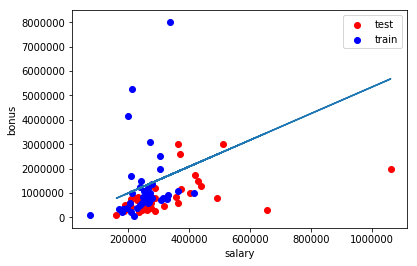

In [3]:
import pickle
from feature_format import featureFormat, targetFeatureSplit

dictionary = pickle.load( open('E:/Data Science/ML/ud120-projects/final_project/final_project_dataset_modified.pkl', 'r') )

def finance_regression(dictionary, features_list, fit_test=False):
    data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
    target, features = targetFeatureSplit( data )

    ### training-testing split needed in regression, just like classification
    from sklearn.cross_validation import train_test_split
    feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
    train_color = 'b'
    test_color = 'r'


    reg = linear_model.LinearRegression()
    reg.fit(feature_train, target_train)


    ### draw the scatterplot, with color-coded training and testing points
    import matplotlib.pyplot as plt
    for feature, target in zip(feature_test, target_test):
        plt.scatter( feature, target, color=test_color ) 
    for feature, target in zip(feature_train, target_train):
        plt.scatter( feature, target, color=train_color ) 

    ### labels for the legend
    plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
    plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")


    # draw the regression line, once it's coded
    plt.plot( feature_test, reg.predict(feature_test) )
    plt.xlabel(features_list[1])
    plt.ylabel(features_list[0])
    plt.legend()
    
    if fit_test:
        reg.fit(feature_test, target_test)
        plt.plot(feature_train, reg.predict(feature_train), color="r") 
    
    return (reg, feature_train, target_train, feature_test, target_test)


(reg, feature_train, target_train, feature_test, target_test) = finance_regression(dictionary, ["bonus", "salary"])

# Extracting Slope and Intercept

In [4]:
reg.coef_[0]

5.4481402888055186

In [5]:
reg.intercept_

-102360.54329388007

# Regression Score: Training Data

In [6]:
reg.score(feature_train, target_train)

0.045509192699524359

# Regression Score: Test Data

In [7]:
reg.score(feature_test, target_test)

-1.484992417368511

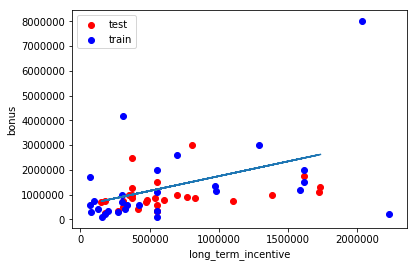

In [8]:
(reg, feature_train, target_train, feature_test, target_test) = finance_regression(dictionary, ['bonus', 'long_term_incentive'])

# Regressing Bonus Against LTI

In [9]:
reg.score(feature_test, target_test)

-0.59271289994986431

# Sneak Peek: Outliers Break Regressions

2.2741011412666925

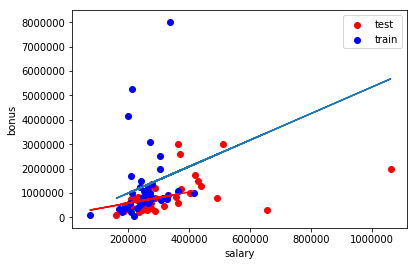

In [10]:
(reg, feature_train, target_train, feature_test, target_test) = finance_regression(dictionary, ["bonus", "salary"], fit_test=True)
reg.coef_[0]